<a href="https://colab.research.google.com/github/sgevatschnaider/BigData-Graphs-Evo-CA-Classroom/blob/main/src/classroom/graphs/notebooks/Los_puentes_de_K%C3%B6nigsberg_y_el_teorema_de_apret%C3%B3n_de_manos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from IPython.display import display, HTML

# --------------------------------------------------------------------------
# PASO 1: Estructura de Datos del Contenido
# --------------------------------------------------------------------------
syllabus_data = [
    {
        "title": "Tema 1: El Problema de los Puentes de Königsberg y el Nacimiento de la Teoría de Grafos",
        "subtopics": [
            "<b>Introducción: El Enigma de una Ciudad</b><ul><li>Contexto histórico en la ciudad de Königsberg</li><li>La pregunta popular</li><li>Importancia histórica</li></ul>",
            "<b>La Abstracción Genial de Euler</b><ul><li>Del mapa físico al modelo matemático</li><li>Definición de grafo (vértices y aristas)</li><li>El concepto de recorrido euleriano</li></ul>",
            "<b>Fundamentos Teóricos Clave</b><ul><li>Grado de un vértice</li><li>Teorema del Apretón de Manos (Handshaking Theorem)</li></ul>",
            "<b>El Teorema de Euler sobre Caminos Eulerianos</b><ul><li>Enunciado del teorema y sus condiciones</li><li>Interpretación y analogías</li></ul>",
            "<b>Demostración Formal del Teorema de Euler</b><ul><li>Argumentos de necesidad y suficiencia</li></ul>",
            "<b>Aplicación y Solución al Problema de Königsberg</b><ul><li>Análisis del grafo y conclusión final</li></ul>",
            "<b>Consecuencias e Impacto Histórico</b><ul><li>Nacimiento de la topología y relevancia actual</li></ul>",
            "<b>Comparación con Problemas Similares</b><ul><li>Caminos eulerianos vs. hamiltonianos (cartero vs. vendedor)</li></ul>"
        ]
    },
    {
        "title": "Tema 2: Ciclos vs. Caminos Eulerianos: ¿Dónde Empezar?",
        "subtopics": [
            "<b>El Ciclo Euleriano:</b> La Libertad de Empezar en Cualquier Lugar (Todos los grados pares).",
            "<b>El Camino Euleriano:</b> Una Ruta con Inicio y Fin Obligatorios (Dos grados impares).",
            "<b>Tabla Comparativa:</b> Resumen visual de las condiciones.",
            "<b>En Resumen:</b> La Regla de Oro del Recorrido (0 o 2 vértices impares)."
        ]
    },
    {
        "title": "Tema 3: Teorema del Apretón de Manos (Handshaking Theorem)",
        "subtopics": [
            "<b>Enunciado del Teorema:</b> La suma de los grados es 2|E|.",
            "<b>El Argumento del Doble Conteo:</b> ¿Por qué funciona?",
            "<b>Consecuencia Clave:</b> El número de vértices de grado impar siempre es par.",
            "<b>Implicaciones:</b> Conexión directa con las condiciones de los recorridos eulerianos.",
            "<b>Aplicaciones y Extensiones:</b> Verificación de datos y grafos dirigidos."
        ]
    }
]

# --------------------------------------------------------------------------
# PASO 2: Clase Generadora de la Página Interactiva
# --------------------------------------------------------------------------
class InteractivePageGenerator:
    """
    Una clase para generar una página HTML interactiva y autocontenida
    a partir de una estructura de datos de contenido.
    """
    def __init__(self, page_title: str, syllabus: list, footer_text: str):
        self.page_title = page_title
        self.syllabus = syllabus
        self.footer_text = footer_text

    def _get_css(self) -> str:
        """Retorna el bloque de estilos CSS completo."""
        return """
        <style>
          :root {
            --bg-primary: linear-gradient(135deg, #f0f9ff 0%, #e0f2fe 100%);
            --bg-secondary: rgba(255,255,255,0.94);
            --bg-tertiary: rgba(240,249,255,0.98);
            --text-primary: #0f172a;
            --text-secondary: #334155;
            --accent: #0ea5e9;
            --border: rgba(2,132,199,.30);
            --radius: 22px;
            --shadow: 0 16px 36px rgba(2,6,23,.10);
            --trans: all .35s cubic-bezier(.25,.8,.25,1);
            --bubble-core: rgba(14,165,233,.65);
            --bubble-glow: rgba(14,165,233,.35);
          }
          html[data-theme="dark"] {
            --bg-primary: linear-gradient(135deg, #0b1220 0%, #0f172a 100%);
            --bg-secondary: rgba(15,23,42,.92);
            --bg-tertiary: rgba(2,6,23,.88);
            --text-primary: #e2e8f0;
            --text-secondary: #cbd5e1;
            --accent: #38bdf8;
            --border: rgba(148,163,184,.28);
            --shadow: 0 16px 36px rgba(0,0,0,.40);
            --bubble-core: rgba(56,189,248,.65);
            --bubble-glow: rgba(56,189,248,.35);
          }
          body {
            background: var(--bg-primary); color: var(--text-primary);
            font-family: Inter, system-ui, -apple-system, Segoe UI, Roboto, sans-serif;
            font-size: 18px; line-height: 1.85; margin: 0; padding-bottom: 26px;
          }
          #appContainer { position:relative; min-height:100vh; }
          .particles { position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }
          .particle {
            position:absolute; border-radius:50%;
            background: radial-gradient( circle at 30% 30%, var(--bubble-core), transparent 60% );
            box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08);
            filter: blur(0.2px); animation: float-anim 26s infinite linear; opacity: .0;
          }
          @keyframes float-anim {
            0%   { transform: translateY(110%) rotate(0deg); opacity: 0; }
            10%  { opacity: .75; } 90%  { opacity: .75; }
            100% { transform: translateY(-15%) rotate(360deg); opacity: 0; }
          }
          .topbar {
            position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between;
            margin: 14px auto 0; padding: 12px 14px; max-width: 960px;
            background: var(--bg-secondary); border: 1.6px solid var(--border);
            border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px;
          }
          .brand { font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }
          .theme-toggle {
            display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px;
            cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary);
            transition: var(--trans); font-weight: 900; color: var(--text-primary);
          }
          .theme-toggle:hover { transform: translateY(-1px); }
          .container { position:relative; z-index:1; max-width:960px; margin: 24px auto 20px; padding: 0 14px; }
          .page-title {
            text-align:center; margin: 16px 0 30px; font-weight: 900; font-size: clamp(28px, 4vw, 42px);
            background: linear-gradient(135deg, var(--accent), #67e8f9); -webkit-background-clip: text; -webkit-text-fill-color: transparent;
          }
          .topic-card {
            background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius);
            box-shadow: var(--shadow); margin: 16px 0; transition: var(--trans);
          }
          .topic-header { display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }
          .topic-title { font-weight: 900; font-size: 20px; }
          .expand-icon { transition: var(--trans); color: var(--text-secondary); font-size: 22px; }
          .topic-card.open .expand-icon { transform: rotate(180deg); color: var(--accent); }
          .topic-content { max-height:0; overflow:hidden; transition: max-height 0.8s ease, padding .4s ease; background: var(--bg-tertiary); }
          .topic-card.open .topic-content { max-height: 4000px; }
          .topic-content-inner { padding: 16px 22px; color: var(--text-secondary); }
          .topic-content-inner ul { padding-left: 25px; }
          .topic-content-inner li { margin:.38rem 0; }
          /* --- ESTILOS PARA EL FOOTER --- */
          footer {
            text-align: center;
            margin-top: 40px;
            padding: 10px;
            font-size: 14px;
            font-weight: 700;
            color: var(--text-secondary);
            opacity: 0.8;
          }
        </style>
        """

    def _get_javascript(self) -> str:
        """Retorna el bloque de JavaScript para toda la interactividad."""
        return """
        <script>
          (function() {
            const root = document.getElementById('appContainer');
            if (!root) return;
            const docElement = document.documentElement;

            // Lógica del cambio de tema
            const themeBtn = root.querySelector('#themeBtn');
            const themeIcon = root.querySelector('#themeIcon');
            function setTheme(t) {
              docElement.setAttribute('data-theme', t);
              try { localStorage.setItem('interactive.theme', t); } catch(e) {}
              const isDark = (t === 'dark');
              themeIcon.className = isDark ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
              themeBtn.setAttribute('aria-pressed', isDark);
            }
            const savedTheme = (typeof localStorage !== 'undefined') ? localStorage.getItem('interactive.theme') : 'dark';
            setTheme(savedTheme || 'dark');
            themeBtn.addEventListener('click', () => {
              const nextTheme = (docElement.getAttribute('data-theme') === 'dark') ? 'light' : 'dark';
              setTheme(nextTheme);
            });

            // Lógica para generar las burbujas
            const particleContainer = root.querySelector('#particles');
            if (particleContainer) {
              for (let i = 0; i < 40; i++) {
                const p = document.createElement('div');
                p.className = 'particle';
                const size = (Math.random() * 14 + 6);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.left = (Math.random() * 100) + '%';
                p.style.bottom = (-12 + Math.random() * 12) + '%';
                p.style.animationDelay = (Math.random() * -24) + 's';
                p.style.animationDuration = (20 + Math.random() * 16) + 's';
                particleContainer.appendChild(p);
              }
            }

            // Lógica para las tarjetas colapsables
            root.querySelectorAll('.topic-header').forEach(header => {
              header.addEventListener('click', () => {
                header.parentElement.classList.toggle('open');
                const isOpen = header.parentElement.classList.contains('open');
                header.setAttribute('aria-expanded', isOpen);
              });
            });

          })();
        </script>
        """

    def _build_html_index(self) -> str:
        """Construye el HTML para la lista de temas a partir de los datos."""
        html_content = ""
        for i, topic in enumerate(self.syllabus):
            subtopics_html = "".join([f"<li>{sub}</li>" for sub in topic['subtopics']])
            html_content += f"""
            <section id="topic-{i}" class="topic-card">
              <div class="topic-header" role="button" aria-expanded="false" aria-controls="content-{i}">
                <span class="topic-title">{topic['title']}</span>
                <i class="fa-solid fa-chevron-down expand-icon"></i>
              </div>
              <div class="topic-content" id="content-{i}">
                <div class="topic-content-inner">
                  <ul>{subtopics_html}</ul>
                </div>
              </div>
            </section>
            """
        return html_content

    def render(self) -> str:
        """
        Ensambla todas las partes (CSS, HTML, JS) en un único documento HTML.
        """
        css = self._get_css()
        js = self._get_javascript()
        index_html = self._build_html_index()

        return f"""
        <!DOCTYPE html>
        <html lang="es" data-theme="dark">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>{self.page_title}</title>
            <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;700;900&display=swap" rel="stylesheet">
            <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet">
            {css}
        </head>
        <body>
        <div id="appContainer">
          <div class="particles" id="particles"></div>

          <header class="topbar">
            <div class="brand"><i class="fa-solid fa-circle-nodes"></i> Teoría de Grafos</div>
            <button id="themeBtn" class="theme-toggle" title="Cambiar tema" aria-pressed="false">
              <i id="themeIcon" class="fa-solid fa-sun" aria-hidden="true"></i>
            </button>
          </header>

          <main class="container">
            <h1 class="page-title">{self.page_title}</h1>
            {index_html}
          </main>

          <!-- FOOTER AÑADIDO -->
          <footer>{self.footer_text}</footer>

        </div>
        {js}
        </body>
        </html>
        """

# --------------------------------------------------------------------------
# PASO 3: Ejecución
# --------------------------------------------------------------------------
page_generator = InteractivePageGenerator(
    page_title="Índice Interactivo del Curso",
    syllabus=syllabus_data,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider"
)

# Renderizar el HTML final
final_html = page_generator.render()

# Mostrar el resultado en la salida de Google Colab
display(HTML(final_html))

In [ ]:
from IPython.display import display, HTML
import html

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (NUEVO CONTENIDO) ---

# --- Contenido Principal para el Acordeón (TEMA: PUENTES DE KÖNIGSBERG) ---
konigsberg_data = [
    {
        "titulo": "1. Introducción: El Enigma de una Ciudad",
        "contenido": """
            <h4>1.1. Contexto histórico en la ciudad de Königsberg</h4>
            <p>Königsberg, una ciudad prusiana en el siglo XVIII (hoy Kaliningrado, Rusia), estaba atravesada por el río Pregel, que formaba dos grandes islas en su cauce. Estas islas y las dos riberas estaban unidas por siete puentes distribuidos de manera irregular.</p>
            <p>La vida cotidiana de los habitantes hacía de estos puentes un punto de tránsito común, y poco a poco surgió una pregunta que se convirtió en un pasatiempo popular, un verdadero rompecabezas urbano:</p>
            <blockquote>¿Puede una persona dar un paseo por la ciudad cruzando cada puente exactamente una vez y regresar al punto de partida?</blockquote>

            <h4>1.2. La pregunta popular</h4>
            <p>La gente intentaba trazar rutas con lápiz y papel, memorizaba recorridos posibles y debatía sobre la manera correcta de cruzar los puentes. Pero nadie encontraba la ruta mágica. Esto mostraba una realidad: había algo estructural en el problema que lo hacía difícil, más allá de la mera destreza para planificar caminos.</p>

            <h4>1.3. Importancia histórica</h4>
            <p>La consulta llegó a <strong>Leonhard Euler (1707–1783)</strong>, uno de los matemáticos más influyentes de la historia. Euler demostró que la ruta era imposible, pero lo más revolucionario fue que, para demostrarlo, no recurrió a la geografía ni a cálculos de distancias: reformuló el problema con un nuevo lenguaje abstracto, lo que dio origen a la <strong>teoría de grafos en 1736</strong>.</p>
        """
    },
    {
        "titulo": "2. La Abstracción Genial de Euler",
        "contenido": """
            <h4>2.1. Del mapa físico al modelo matemático</h4>
            <p>Si intentamos resolver el problema usando un mapa de la ciudad, rápidamente nos enredamos con las formas del río y la disposición irregular de los puentes. Euler se dio cuenta de que eso era irrelevante: el problema no es geométrico, sino topológico y estructural.</p>
            <p>Lo único importante era:</p>
            <ul>
                <li>Cuántas masas de tierra hay.</li>
                <li>Cómo están conectadas entre sí por puentes.</li>
            </ul>
            <p>El mapa físico se podía reemplazar por un esquema abstracto sin perder información esencial.</p>

            <h4>2.2. Definición de grafo</h4>
            <p>Para formalizar esto, Euler introduce la noción de grafo:</p>
            <ul>
                <li>Los <strong>vértices (o nodos)</strong> representan las masas de tierra.</li>
                <li>Las <strong>aristas</strong> representan los puentes que las conectan.</li>
            </ul>
            <p>En el caso de Königsberg, el modelo queda así:</p>
            <ul>
                <li><strong>4 vértices</strong> (dos riberas + dos islas).</li>
                <li><strong>7 aristas</strong> (los siete puentes).</li>
            </ul>

            <h4>2.3. El concepto de recorrido euleriano</h4>
            <p>Con el modelo definido, la pregunta original se traduce a un lenguaje matemático preciso: ¿Existe un <strong>recorrido euleriano</strong> en este grafo? Un recorrido euleriano es un camino que pasa por todas las aristas exactamente una vez. Si además empieza y termina en el mismo vértice, se denomina <strong>ciclo euleriano</strong>.</p>
        """
    },
    {
        "titulo": "3. Fundamentos Teóricos Clave",
        "contenido": """
            <h4>3.1. Grado de un vértice</h4>
            <p>El concepto más importante que introdujo Euler para resolver el problema es el <strong>grado de un vértice</strong>, denotado como $deg(v)$. Es simplemente el número de aristas que inciden en él. Por ejemplo, si una isla tiene 3 puentes que la conectan, su vértice correspondiente tiene grado 3. El grado mide el "balance de flujos" en cada nodo del grafo.</p>

            <h4>3.2. Teorema del Apretón de Manos</h4>
            <p>Este lema fundamental establece que en cualquier grafo $G=(V,E)$, la suma de los grados de todos sus vértices es igual al doble del número de aristas.</p>
            <div class="formula-block">$$ \\sum_{v \\in V} \\deg(v) = 2|E| $$</div>
            <blockquote><strong>Demostración intuitiva (la fiesta de saludos):</strong> Imagina una fiesta donde cada persona anota cuántos apretones de mano dio. Si sumamos todos esos números, cada saludo se cuenta dos veces (una por cada persona involucrada). De igual forma, cada arista en un grafo conecta dos vértices, contribuyendo +1 al grado de cada uno.</blockquote>
            <p><strong>Consecuencia inmediata:</strong> El número de vértices con grado impar en cualquier grafo siempre debe ser par. ¡Es imposible construir un grafo con un número impar de vértices de grado impar!</p>
        """
    },
    {
        "titulo": "4. El Teorema de Euler sobre Caminos Eulerianos",
        "contenido": """
            <h4>4.1. Enunciado del teorema</h4>
            <p>Este es el primer teorema de la historia de la teoría de grafos, y proporciona una solución completa y elegante al problema. Para un grafo conexo $G$:</p>
            <ol>
                <li>$G$ tiene un <strong>ciclo euleriano</strong> si y solo si <strong>todos</strong> sus vértices tienen grado par.</li>
                <li>$G$ tiene un <strong>camino euleriano abierto</strong> (que empieza y termina en vértices distintos) si y solo si tiene <strong>exactamente dos</strong> vértices de grado impar.</li>
                <li>Si hay más de dos vértices de grado impar, <strong>ningún tipo de recorrido euleriano es posible</strong>.</li>
            </ol>

            <h4>4.2. Interpretación de las condiciones</h4>
            <ul>
                <li><strong>Todos pares (Ciclo):</strong> Hay un balance perfecto. Cada vez que una ruta entra a un vértice, hay una arista de salida sin usar. Esto garantiza que se puede completar un circuito cerrado.</li>
                <li><strong>Dos impares (Camino):</strong> Los dos vértices impares actúan como los puntos de inicio y fin naturales del recorrido. Uno tiene una "salida" extra y el otro una "entrada" extra.</li>
                <li><strong>Más de dos impares (Imposible):</strong> Hay demasiados puntos de "desequilibrio". El recorrido inevitablemente quedará atrapado o tendrá que omitir aristas.</li>
            </ul>

            <h4>4.3. Analogía: Estaciones de tren</h4>
            <p>Imagina que los vértices son estaciones y las aristas son vías. Si cada estación tiene un número par de vías, un tren puede recorrer todo el sistema y volver a su origen. Si exactamente dos estaciones tienen un número impar de vías, esas serán la estación de partida y la de llegada. Con más de dos, el viaje completo es imposible sin repetir vías.</p>
        """
    },
    {
        "titulo": "5. Demostración Formal del Teorema",
        "contenido": """
            <h4>5.1. Necesidad (⇒)</h4>
            <p>Esta parte es intuitiva. Si existe un recorrido euleriano:</p>
            <ul>
                <li>Para cualquier vértice <strong>intermedio</strong> en el camino, cada vez que entramos por una arista, debemos salir por otra. Esto empareja las aristas de dos en dos, por lo que su grado debe ser par.</li>
                <li>Si el camino es un <strong>ciclo</strong>, el vértice de inicio/fin también es intermedio en cierto sentido, por lo que todos los vértices deben tener grado par.</li>
                <li>Si el camino es <strong>abierto</strong>, solo los vértices de inicio y fin rompen esta regla (tienen una arista "extra" de salida o llegada), por lo que solo ellos tendrán grado impar.</li>
            </ul>

            <h4>5.2. Suficiencia (⇐) - Todos los vértices pares</h4>
            <p>Partiendo de un vértice cualquiera, empezamos a recorrer aristas sin repetir. Como todos los grados son pares, nunca nos quedaremos "atrapados". Eventualmente, debemos regresar al punto de partida, formando un ciclo inicial. Si este ciclo no cubre todas las aristas, debe haber un vértice en el ciclo que toque una arista no utilizada. Desde ese vértice, podemos construir un segundo ciclo y "empalmarlo" con el primero. Repitiendo este proceso, cubrimos todas las aristas.</p>

            <h4>5.3. Suficiencia (⇐) - Dos vértices impares</h4>
            <p>Sean $u$ y $v$ los dos únicos vértices de grado impar. Si añadimos una <strong>arista ficticia</strong> que los conecte, en este nuevo grafo todos los vértices ahora tienen grado par. Por el caso anterior, sabemos que existe un ciclo euleriano en este grafo modificado. Si ahora eliminamos la arista ficticia de este ciclo, lo que nos queda es un camino euleriano abierto que va de $u$ a $v$.</p>
        """
    },
    {
        "titulo": "6. Aplicación y Solución al Problema de Königsberg",
        "contenido": """
            <h4>6.1. Cálculo de grados en el grafo de Königsberg</h4>
            <p>Al aplicar el concepto de grado al grafo de la ciudad, obtenemos:</p>
            <ul>
                <li>Ribera A: <strong>grado 3</strong></li>
                <li>Ribera B: <strong>grado 5</strong></li>
                <li>Isla C: <strong>grado 3</strong></li>
                <li>Isla D: <strong>grado 3</strong></li>
            </ul>

            <h4>6.2. Identificación del caso</h4>
            <p>Observamos que no uno ni dos, sino los cuatro vértices del grafo tienen grado impar.</p>

            <h4>6.3. Conclusión final</h4>
            <p>Según el teorema de Euler, para que un recorrido euleriano exista, se necesitan 0 o 2 vértices de grado impar. Como el grafo de Königsberg tiene 4, no cumple ninguna de las condiciones.</p>
            <blockquote>Por lo tanto, es matemáticamente imposible realizar un paseo que cruce cada uno de los siete puentes una sola vez.</blockquote>
            <p>Euler no solo resolvió la pregunta, sino que proporcionó una herramienta universal para analizar la conectividad en cualquier red.</p>
        """
    },
    {
        "titulo": "7. Consecuencias e Impacto Histórico",
        "contenido": """
            <h4>7.1. Nacimiento de la teoría de grafos</h4>
            <p>La publicación de Euler en 1736, "Solutio problematis ad geometriam situs pertinentis", es universalmente considerada el acto fundacional de la teoría de grafos y de la topología. Demostró que era posible estudiar las propiedades de las figuras que no dependen de medidas, sino solo de la conexión y la estructura.</p>

            <h4>7.2. Relevancia actual</h4>
            <p>La teoría de grafos es hoy una piedra angular de las matemáticas discretas y la informática. Sus aplicaciones son innumerables:</p>
            <ul>
                <li><strong>Redes de computadoras:</strong> El enrutamiento de datos en Internet se basa en algoritmos de grafos.</li>
                <li><strong>Transporte y logística:</strong> Optimización de rutas para servicios de reparto, recolección de basura o inspección de redes (el "Problema del Cartero Chino" es una generalización directa).</li>
                <li><strong>Modelos científicos:</strong> Las redes neuronales, las interacciones de proteínas en biología, las redes sociales en sociología y las estructuras moleculares en química se modelan como grafos.</li>
            </ul>
        """
    },
    {
        "titulo": "8. Comparación con Problemas Similares",
        "contenido": """
            <h4>8.1. Caminos eulerianos vs. hamiltonianos</h4>
            <p>Es crucial no confundir un camino euleriano con un <strong>camino hamiltoniano</strong>.</p>
            <ul>
                <li><strong>Euleriano:</strong> Recorre todas las <strong>aristas</strong> exactamente una vez.</li>
                <li><strong>Hamiltoniano:</strong> Visita todos los <strong>vértices</strong> exactamente una vez.</li>
            </ul>

            <h4>8.2. Diferencia en dificultad computacional</h4>
            <p>Mientras que determinar si existe un camino euleriano es muy fácil (basta con contar los grados de los vértices), el problema de encontrar un camino hamiltoniano es uno de los problemas más famosos en informática por su dificultad (es <strong>NP-completo</strong>). No existe un criterio general simple como el de Euler.</p>

            <h4>8.3. Ejemplos prácticos</h4>
            <blockquote>
                <p><strong>Problema euleriano:</strong> Un cartero que debe recorrer todas las calles de un barrio (las aristas) para repartir el correo de la forma más eficiente.</p>
                <p><strong>Problema hamiltoniano:</strong> Un vendedor viajero que debe visitar una lista de ciudades (los vértices) una sola vez, buscando la ruta más corta (un problema aún más difícil, el TSP).</p>
            </blockquote>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (SIN CAMBIOS) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(konigsberg_data)

# --- PLANTILLA PROFESIONAL (SIN CAMBIOS) ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{ tex: {{ inlineMath: [['$', '$'], ['\\\\(', '\\\\)']], displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']] }}, svg: {{ fontCache: 'global' }} }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #3498db;
      --accent-secondary: #2980b9;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #2980b9;
      --accent-secondary: #3498db;
      --accent-gradient: linear-gradient(135deg, #2980b9 0%, #3498db 100%);
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}
    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1rem; }}
    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}
    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 2500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}
    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; border-left: 3px solid var(--accent-primary); padding-left: 10px; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}
    .formula-block {{ padding: 1.5rem; background: rgba(44, 62, 80, 0.1); border-radius: 10px; text-align: center; overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); }}
    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
    @media (max-width: 768px) {{ .container {{ padding: 1rem; }} .topic-header {{ padding: 1rem 1.5rem; }} .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }} .formula-block {{ padding: 1rem; }} }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});
        setTheme(localStorage.getItem('theme') || 'dark');
        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
                if (window.MathJax) {{ window.MathJax.typesetPromise([card]); }}
            }});
        }});
        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}
        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
            if (window.MathJax) {{ window.MathJax.typesetPromise([firstTopic]); }}
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="📘 El Problema de los Puentes de Königsberg y el Nacimiento de la Teoría de Grafos",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html="",  # No hay un bloque de conclusión separado en este texto
    footer_text="Material interactivo Elaborado por el profesor Sergio Gevatschnaider"
)

# Renderiza el HTML final en la salida de la celda
display(HTML(final_html))

In [ ]:
from IPython.display import display, HTML
import html

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (NUEVO CONTENIDO CON TABLA DE SOLUCIONES) ---

# --- Bloque de Conclusión ---
conclusion_eulerian_html = """
<div class="content-block">
    <h2>En Resumen: La Regla de Oro del Recorrido</h2>
    <p>La estructura del grafo, específicamente el número de vértices con grado impar, dicta por completo la naturaleza del recorrido. La regla es simple y poderosa:</p>
    <ul>
        <li><strong>Cero (0) vértices impares</strong> → Es un <strong>Ciclo Euleriano</strong> → Tienes libertad total, puedes empezar en cualquier vértice y siempre volverás a él.</li>
        <li><strong>Dos (2) vértices impares</strong> → Es un <strong>Camino Euleriano</strong> → La ruta está definida, debes empezar en un impar y obligatoriamente terminarás en el otro.</li>
    </ul>
    <p>Esta dicotomía es uno de los resultados más elegantes y fundamentales de la teoría de grafos.</p>
</div>
"""

# --- Contenido Principal para el Acordeón (TEMA: CICLOS VS. CAMINOS) ---
eulerian_paths_data = [
    {
        "titulo": "1. El Ciclo Euleriano: La Libertad de Empezar en Cualquier Lugar",
        "contenido": """
            <h4>La Propiedad del Balance Perfecto</h4>
            <p>Cuando un grafo tiene un <strong>Ciclo Euleriano</strong>, significa que todos sus vértices tienen un grado par. Esta condición de "balance perfecto" tiene una consecuencia maravillosa:</p>
            <blockquote><strong>Puedes empezar tu recorrido en CUALQUIER vértice que elijas.</strong> Sin excepción.</blockquote>
            <p>La intuición es simple: si cada vértice tiene un número par de "puertas" (aristas), por cada puerta que usas para entrar a un vértice, siempre te quedará una puerta sin usar para salir. Nunca te quedas atrapado.</p>
            <ul>
                <li><strong>No hay un punto de inicio "correcto" o "incorrecto".</strong> Todos son igualmente válidos.</li>
                <li>Independientemente de dónde empieces, el recorrido siempre te llevará de vuelta al punto de partida, completando el ciclo.</li>
            </ul>
        """
    },
    {
        "titulo": "2. El Camino Euleriano: Una Ruta con Inicio y Fin Obligatorios",
        "contenido": """
            <h4>La Ruta Definida por el Desequilibrio</h4>
            <p>Un <strong>Camino Euleriano</strong> existe cuando el grafo tiene exactamente dos vértices de grado impar. Estos dos vértices son especiales y dictan las reglas del juego:</p>
            <blockquote>La ruta <strong>SIEMPRE</strong> debe empezar en uno de los dos vértices de grado impar y <strong>SIEMPRE</strong> terminará en el otro.</blockquote>
            <p>Los dos vértices impares son los puntos de "desequilibrio" natural del grafo:</p>
            <ul>
                <li><strong>El Vértice de Inicio:</strong> Tiene una "salida" extra que no se corresponde con una entrada. Es el punto de partida natural.</li>
                <li><strong>El Vértice Final:</strong> Tiene una "entrada" extra que no se corresponde con una salida. Es el punto de llegada inevitable.</li>
            </ul>
            <p>En el escenario interactivo donde se quita el puente AD, los únicos vértices impares son <strong>B y C</strong>. Por lo tanto, las únicas rutas completas posibles son las que van de B a C o de C a B.</p>
        """
    },
    {
        "titulo": "3. Tabla Comparativa: La Diferencia Clave",
        "contenido": """
            <h4>Un Resumen Visual</h4>
            <p>La decisión de dónde empezar tu recorrido se reduce a una simple pregunta: ¿cuántos vértices de grado impar tiene el grafo?</p>
            <style>
                .styled-table { width: 100%; border-collapse: collapse; margin: 1.5rem 0; }
                .styled-table th, .styled-table td { border: 1px solid var(--border-color); padding: 12px 15px; text-align: left; }
                .styled-table th { background-color: rgba(127, 140, 141, 0.1); font-weight: 600; color: var(--text-primary); }
                .styled-table tr:nth-of-type(even) { background-color: rgba(127, 140, 141, 0.05); }
                .highlight-ok { color: #16a34a; font-weight: 700; }
                .highlight-warn { color: #f59e0b; font-weight: 700; }
            </style>
            <table class="styled-table">
                <thead>
                    <tr>
                        <th>Característica</th>
                        <th class="highlight-ok">Ciclo Euleriano</th>
                        <th class="highlight-warn">Camino Euleriano</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>Condición de Grados</td>
                        <td><strong>Cero</strong> vértices impares (todos pares)</td>
                        <td><strong>Exactamente dos</strong> vértices impares</td>
                    </tr>
                    <tr>
                        <td>Punto de Inicio</td>
                        <td class="highlight-ok"><em>CUALQUIERA</em> de los vértices</td>
                        <td class="highlight-warn"><em>OBLIGATORIAMENTE</em> uno de los dos impares</td>
                    </tr>
                    <tr>
                        <td>Punto Final</td>
                        <td class="highlight-ok">El <em>MISMO</em> que el de inicio</td>
                        <td class="highlight-warn">El <em>OTRO</em> vértice impar</td>
                    </tr>
                </tbody>
            </table>
        """
    },
    {
        "titulo": "4. Ejemplos de Rutas (Soluciones)",
        "contenido": """
            <h4>Aplicando la Teoría en el Simulador</h4>
            <p>Aunque existen múltiples secuencias correctas para cada caso, aquí se muestra un ejemplo de una solución completa para cada escenario del simulador.</p>
            <style>
                .route-path {
                    font-family: 'JetBrains Mono', monospace;
                    background-color: rgba(127, 140, 141, 0.1);
                    padding: 10px 12px;
                    border-radius: 8px;
                    line-height: 1.6;
                    font-size: 0.95em;
                    word-break: break-all;
                }
            </style>
            <table class="styled-table">
                <thead>
                    <tr>
                        <th class="highlight-warn">Solución: Camino Euleriano</th>
                        <th class="highlight-ok">Solución: Ciclo Euleriano</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>
                            <p><strong>Puentes:</strong> 6<br><strong>Nodos Impares:</strong> B y C</p>
                            <p>Una ruta válida <strong>(empezando en B)</strong>:</p>
                            <div class="route-path">B → A → C → D → B → A → C</div>
                        </td>
                        <td>
                            <p><strong>Puentes:</strong> 9<br><strong>Nodos Impares:</strong> Ninguno</p>
                            <p>Una ruta válida <strong>(empezando en A)</strong>:</p>
                            <div class="route-path">A → B → D → C → A → C (otro) → B (otro) → D (extra) → A (extra)</div>
                        </td>
                    </tr>
                </tbody>
            </table>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (SIN CAMBIOS) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(eulerian_paths_data)

# --- PLANTILLA PROFESIONAL (SIN CAMBIOS) ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #16a34a;
      --accent-secondary: #1abc9c;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #1abc9c;
      --accent-secondary: #16a34a;
      --accent-gradient: linear-gradient(135deg, #1abc9c 0%, #16a34a 100%);
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}
    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1rem; }}
    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}
    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-top: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); }}
    .content-block ul {{ padding-left: 25px; }}
    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 2500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}
    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; border-left: 3px solid var(--accent-primary); padding-left: 10px; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong, .topic-content b {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}
    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
    @media (max-width: 768px) {{ .container {{ padding: 1rem; }} .topic-header {{ padding: 1rem 1.5rem; }} .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }} }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});
        setTheme(localStorage.getItem('theme') || 'dark');
        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});
        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}
        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Ciclos vs. Caminos Eulerianos: ¿Dónde Empezar?",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_eulerian_html,
    footer_text="Material interactivo Elaborado por el profesor Sergio Gevatschnaider"
)

# Renderiza el HTML final en la salida de la celda
display(HTML(final_html))

In [ ]:
from IPython.display import display, HTML
import html

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (NUEVO CONTENIDO) ---

# --- Bloque de Conclusión ---
conclusion_apreton_manos_html = """
<div class="content-block">
    <h2>En Resumen: Una Piedra Angular de la Teoría de Grafos</h2>
    <p>El Teorema del Apretón de Manos no solo conecta de manera elegante vértices y aristas, sino que también:</p>
    <ul>
        <li>Explica restricciones estructurales fundamentales (como la paridad de vértices impares).</li>
        <li>Se convierte en el criterio básico para la existencia de recorridos eulerianos.</li>
        <li>Tiene aplicaciones prácticas en áreas tan diversas como redes sociales, telecomunicaciones, química y transporte.</li>
    </ul>
    <p>Es un ejemplo perfecto de cómo una observación simple puede tener consecuencias profundas y universales en el estudio de las redes.</p>
</div>
"""

# --- Contenido Principal para el Acordeón (TEMA: TEOREMA DEL APRETÓN DE MANOS) ---
apreton_manos_data = [
    {
        "titulo": "1. Enunciado del Teorema",
        "contenido": """
            <h4>Una Relación Fundamental</h4>
            <p>El Teorema del Apretón de Manos (también conocido como el Primer Teorema de la Teoría de Grafos) establece una relación inmutable entre el número de aristas y los grados de los vértices en cualquier grafo no dirigido:</p>
            <div class="formula-block">$$ \\sum_{v \\in V} \\deg(v) = 2|E| $$</div>
            <p>Donde:</p>
            <ul>
                <li><b>V</b>: Es el conjunto de todos los vértices del grafo.</li>
                <li><b>deg(v)</b>: Es el grado del vértice $v$, es decir, el número de aristas que inciden en él.</li>
                <li><b>|E|</b>: Es el número total de aristas en el grafo.</li>
            </ul>
            <blockquote>👉 <strong>La idea intuitiva:</strong> cada arista conecta exactamente dos extremos. Por lo tanto, cuando sumamos los grados de todos los vértices, cada arista se está contando precisamente dos veces (una por cada vértice que conecta).</blockquote>
        """
    },
    {
        "titulo": "2. Demostración Formal",
        "contenido": """
            <h4>Una Prueba Directa por Doble Conteo</h4>
            <p>Sea un grafo no dirigido $G=(V,E)$.</p>
            <p>La demostración se basa en el principio de doble conteo. Consideremos la suma de todos los grados: $ \\sum_{v \\in V} \\deg(v) $. </p>
            <p>Cada arista $e = \\{u, v\\}$ contribuye exactamente en 1 al grado de $u$ y en 1 al grado de $v$. Por lo tanto, cada arista contribuye con un total de 2 a la suma total de los grados.</p>
            <p>Como esto es cierto para cada una de las $|E|$ aristas del grafo, la suma total debe ser la suma de las contribuciones de todas las aristas, lo que nos lleva directamente a la conclusión:</p>
            <div class="formula-block">$$ \\sum_{v \\in V} \\deg(v) = 2|E| $$</div>
            <p>Esta prueba es universalmente válida para cualquier grafo no dirigido, sin importar si es conexo o no, simple o un multigrafo.</p>
        """
    },
    {
        "titulo": "3. Ejemplo Ilustrativo",
        "contenido": """
            <h4>Verificando el Teorema en la Práctica</h4>
            <p>Consideremos un grafo simple con un conjunto de vértices $V = \\{A, B, C, D\\}$ y un conjunto de aristas $E = \\{(A,B), (A,C), (B,C), (C,D)\\}$.</p>
            <p>Primero, calculamos el grado de cada vértice:</p>
            <ul>
                <li>$ \\deg(A) = 2 $ (conectado a B y C)</li>
                <li>$ \\deg(B) = 2 $ (conectado a A y C)</li>
                <li>$ \\deg(C) = 3 $ (conectado a A, B y D)</li>
                <li>$ \\deg(D) = 1 $ (conectado a C)</li>
            </ul>
            <p>A continuación, calculamos ambos lados de la ecuación del teorema:</p>
            <ul>
                <li><strong>Suma de grados:</strong> $ \\sum \\deg(v) = 2 + 2 + 3 + 1 = 8 $</li>
                <li><strong>Doble del número de aristas:</strong> El grafo tiene $|E|=4$ aristas. Por lo tanto, $ 2|E| = 2 \\cdot 4 = 8 $.</li>
            </ul>
            <blockquote>✔️ Como $8 = 8$, el teorema se cumple perfectamente.</blockquote>
        """
    },
    {
        "titulo": "4. Consecuencias Inmediatas",
        "contenido": """
            <h4>4.1. La Paridad de los Vértices Impares</h4>
            <p>Dado que la suma de todos los grados, $ \\sum \\deg(v) $, es siempre igual a $2|E|$, esta suma debe ser un número par. Para que una suma de enteros sea par, el número de términos impares en esa suma debe ser necesariamente par.</p>
            <blockquote>Por lo tanto, en cualquier grafo, el número de vértices de grado impar es siempre par (0, 2, 4, ...). Es imposible construir un grafo con 1, 3, 5, o cualquier cantidad impar de vértices de grado impar.</blockquote>
            <p>Esta observación fue la clave que usó Euler para resolver el <a href="#">Problema de los Puentes de Königsberg</a> en 1736.</p>

            <h4>4.2. Condiciones para Recorridos Eulerianos</h4>
            <p>Esta consecuencia conduce directamente a las condiciones para la existencia de caminos eulerianos:</p>
            <ul>
                <li>Si todos los vértices tienen grado par (0 vértices impares), el grafo tiene un <strong>circuito euleriano</strong>.</li>
                <li>Si hay exactamente 2 vértices de grado impar, el grafo tiene un <strong>camino euleriano abierto</strong>.</li>
                <li>Si hay más de 2 vértices impares, no existe ningún tipo de recorrido euleriano.</li>
            </ul>
        """
    },
    {
        "titulo": "5. Aplicaciones del Teorema",
        "contenido": """
            <h4>Más Allá de la Teoría</h4>
            <p>Este teorema simple tiene aplicaciones prácticas para validar y analizar redes:</p>
            <ul>
                <li><strong>Verificación de Datos:</strong> Permite detectar inconsistencias en datos de redes. Si la suma de grados reportada no es par o no coincide con el doble del número de aristas, hay un error.</li>
                <li><strong>Redes Sociales:</strong> En modelos donde la amistad es recíproca, el teorema asegura que el total de "conexiones" individuales es el doble del número de amistades reales.</li>
                <li><strong>Diseño de Redes:</strong> En telecomunicaciones o informática, ayuda a analizar la distribución de enlaces y el balanceo de carga entre servidores o routers.</li>
                <li><strong>Modelos Químicos:</strong> Si los átomos son vértices y los enlaces son aristas, el teorema permite verificar la valencia (grado) total en estructuras moleculares complejas.</li>
            </ul>
        """
    },
    {
        "titulo": "6. Extensión a Grafos Dirigidos",
        "contenido": """
            <h4>Cuando las Aristas Tienen Dirección</h4>
            <p>En un grafo dirigido, cada arista tiene un origen y un destino. Esto nos obliga a definir dos tipos de grado:</p>
            <ul>
                <li><strong>Grado de entrada ($deg^-(v)$):</strong> Número de aristas que llegan al vértice $v$.</li>
                <li><strong>Grado de salida ($deg^+(v)$):</strong> Número de aristas que salen del vértice $v$.</li>
            </ul>
            <p>El análogo del Teorema del Apretón de Manos para grafos dirigidos establece que la suma de todos los grados de entrada es igual a la suma de todos los grados de salida, y ambas son iguales al número total de aristas.</p>
            <div class="formula-block">$$ \\sum_{v \\in V} \\deg^+(v) = \\sum_{v \\in V} \\deg^-(v) = |E| $$</div>
            <blockquote>La razón es simple: cada arista que sale de un vértice debe, por definición, entrar en otro, contribuyendo +1 a la suma total de salidas y +1 a la suma total de entradas.</blockquote>
        """
    },
        {
        "titulo": "7. Perspectiva Histórica",
        "contenido": """
            <h4>El Origen de Todo</h4>
            <p>Aunque el nombre "Teorema del Apretón de Manos" es una analogía moderna y popular, la idea subyacente fue utilizada por primera vez por <strong>Leonhard Euler en 1736</strong>.</p>
            <p>Al analizar el problema de los Puentes de Königsberg, Euler se dio cuenta de la importancia de la paridad de los grados de los vértices. Su conclusión de que el recorrido era imposible se basó directamente en la consecuencia de que había cuatro vértices de grado impar.</p>
            <blockquote>Por esta razón, este resultado, en su esencia, puede ser considerado el <strong>primer teorema formal de la historia de la teoría de grafos</strong>, marcando el nacimiento de esta disciplina.</blockquote>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (SIN CAMBIOS) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(apreton_manos_data)

# --- PLANTILLA PROFESIONAL (SIN CAMBIOS) ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{ tex: {{ inlineMath: [['$', '$'], ['\\\\(', '\\\\)']], displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']] }}, svg: {{ fontCache: 'global' }} }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #8e44ad;
      --accent-secondary: #9b59b6;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #9b59b6;
      --accent-secondary: #8e44ad;
      --accent-gradient: linear-gradient(135deg, #9b59b6 0%, #8e44ad 100%);
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}
    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1rem; }}
    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}
    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-top: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); }}
    .content-block ul {{ padding-left: 25px; }}
    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 2500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}
    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; border-left: 3px solid var(--accent-primary); padding-left: 10px; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong, .topic-content b {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}
    .formula-block {{ padding: 1.5rem; background: rgba(44, 62, 80, 0.1); border-radius: 10px; text-align: center; overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); }}
    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
    @media (max-width: 768px) {{ .container {{ padding: 1rem; }} .topic-header {{ padding: 1rem 1.5rem; }} .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }} .formula-block {{ padding: 1rem; }} }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});
        setTheme(localStorage.getItem('theme') || 'dark');
        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
                if (window.MathJax) {{ window.MathJax.typesetPromise([card]); }}
            }});
        }});
        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}
        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
            if (window.MathJax) {{ window.MathJax.typesetPromise([firstTopic]); }}
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="🤝 Teorema del Apretón de Manos",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_apreton_manos_html,
    footer_text="Material interactivo Elaborado por el profesor Sergio Gevatschnaider"
)

# Renderiza el HTML final en la salida de la celda
display(HTML(final_html))

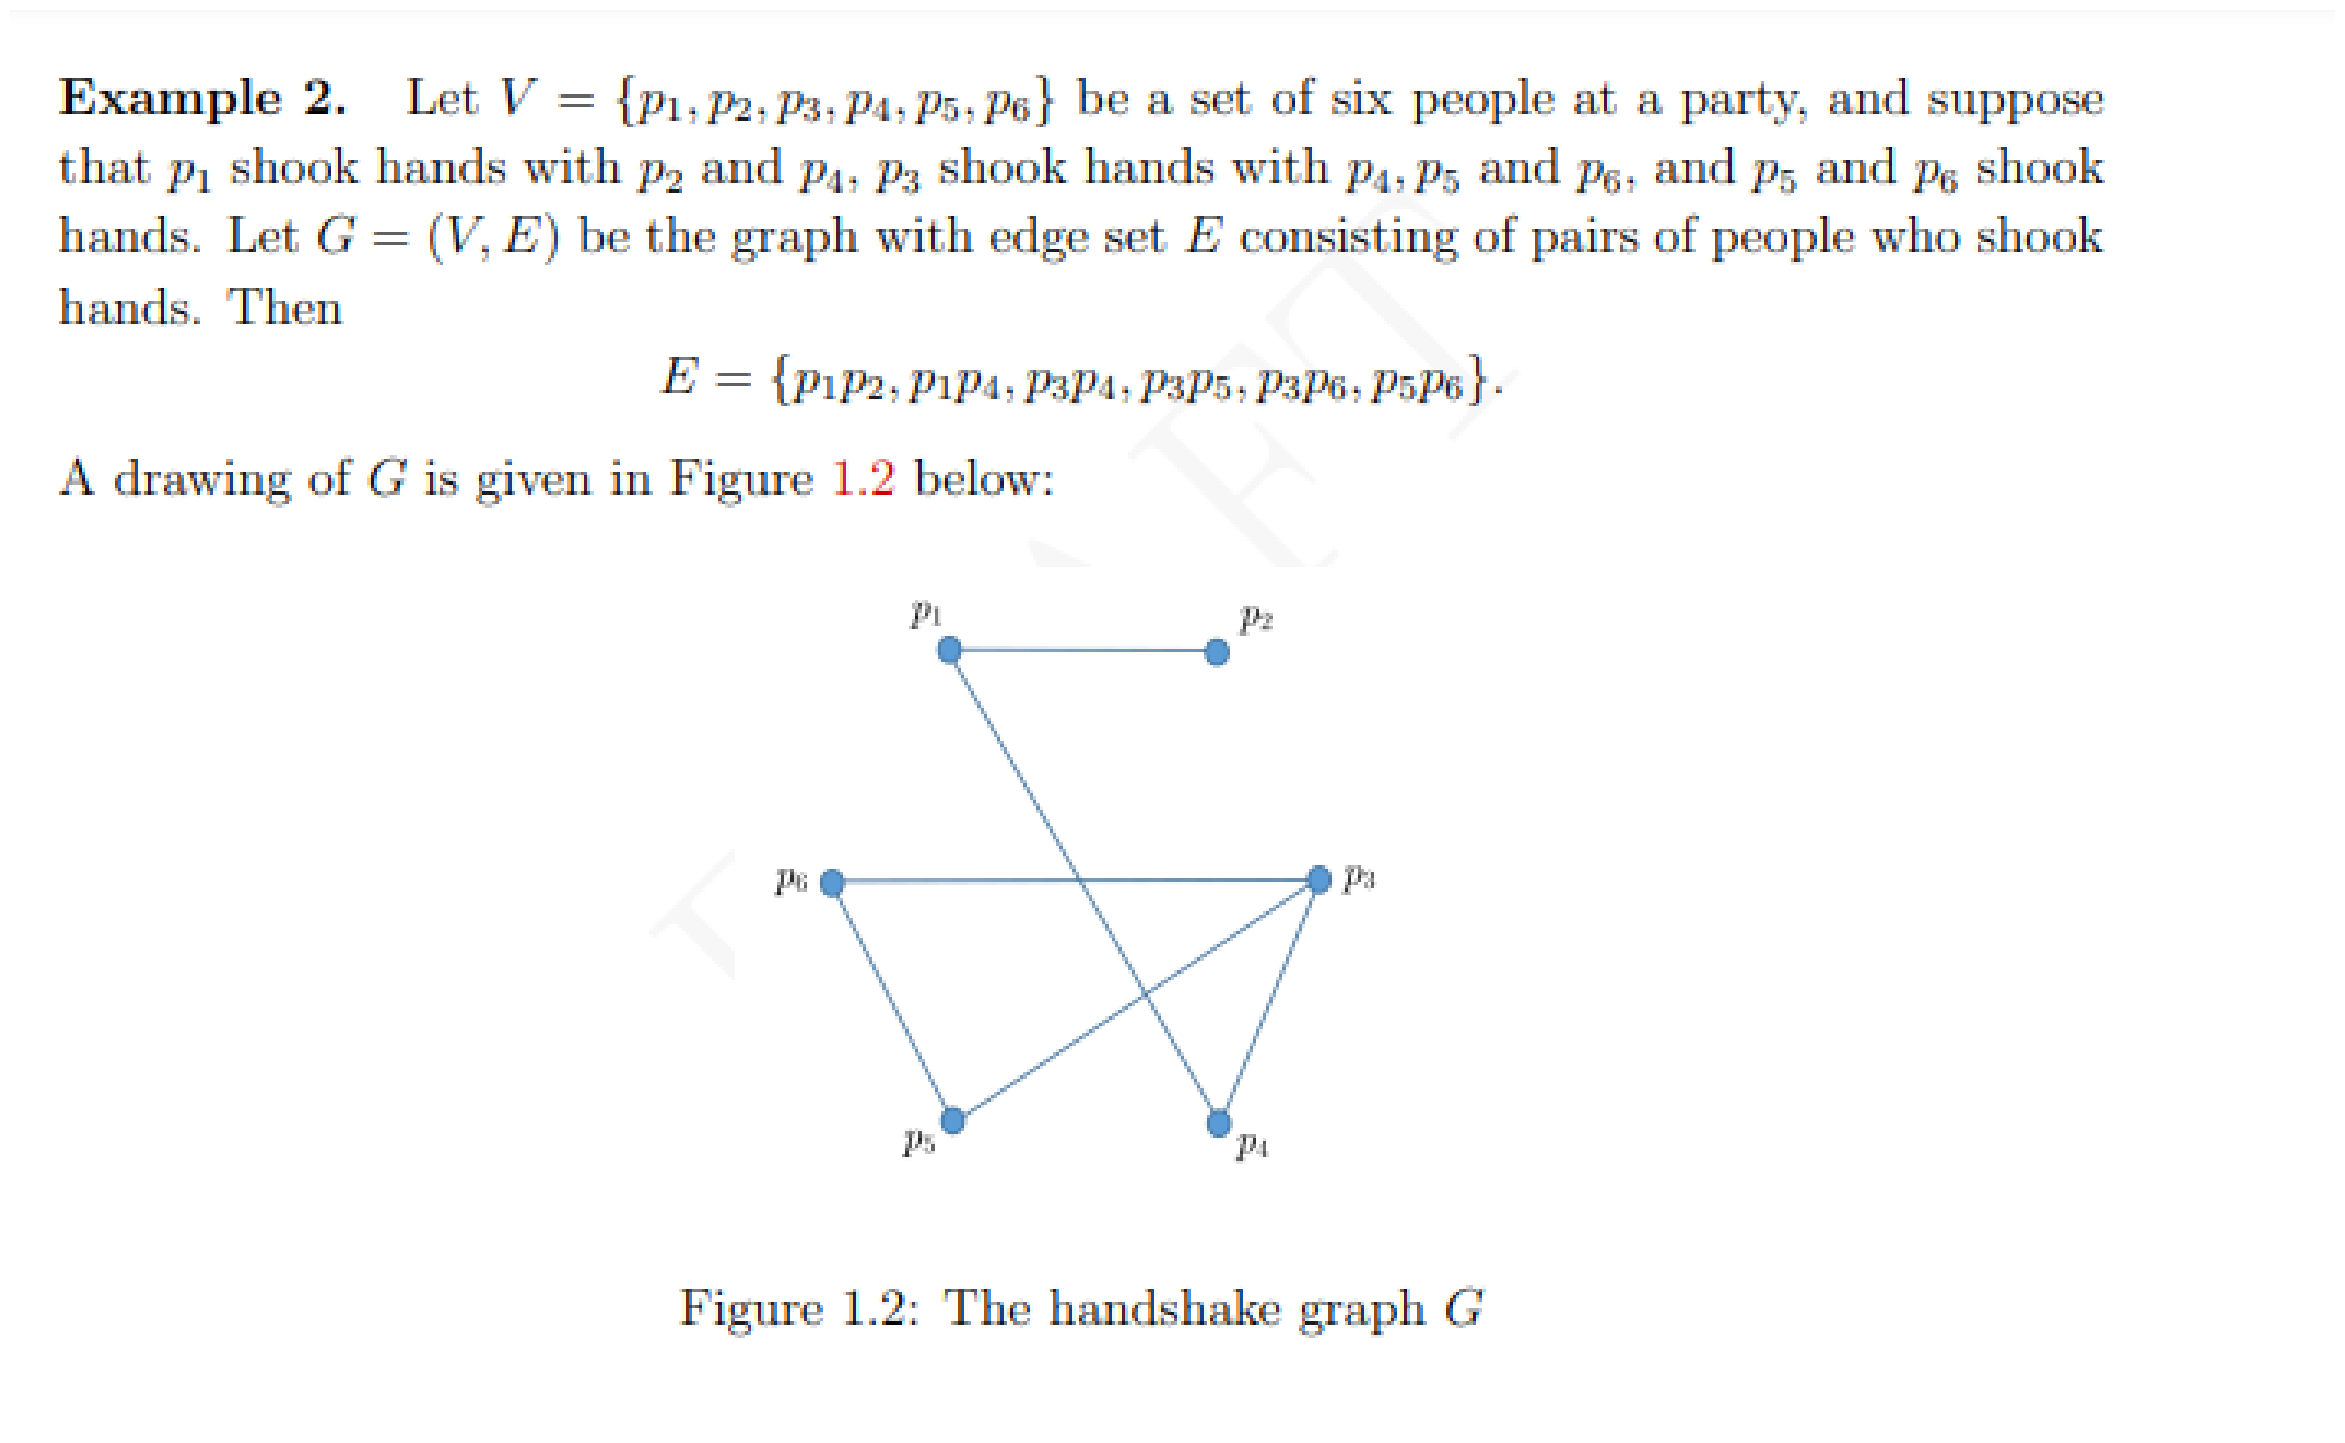

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sendero a la imagen
img = mpimg.imread('/handsshank.png')

# Ajustar el tamaño de la figura (por ejemplo, 10x8 pulgadas)
plt.figure(figsize=(30, 24))

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from IPython.display import display, HTML
import html

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (NUEVO CONTENIDO) ---

# --- Bloque de Conclusión ---
conclusion_html_content = """
<div class="content-block">
    <h2>En Resumen: Una Piedra Angular de la Teoría de Grafos</h2>
    <p>El Teorema del Handshaking es mucho más que una simple curiosidad matemática. Es un principio fundamental que revela una propiedad intrínseca de la estructura de cualquier grafo. La regla de que <strong>"el número de vértices de grado impar siempre debe ser par"</strong> es la base sobre la cual se construyen conceptos más avanzados, como la posibilidad de encontrar recorridos que atraviesen cada arista una sola vez.</p>
    <p>Entender este teorema es el primer paso para dominar el análisis de redes y recorridos.</p>
</div>
"""

# --- Contenido Principal para el Acordeón (TEMA: TEOREMA DEL HANDSHAKING) ---
teoria_handshaking_data = [
    {
        "titulo": "1. El Teorema del Handshaking (Lema del Apretón de Manos)",
        "contenido": """
            <h4>El Enunciado Formal</h4>
            <p>Este teorema establece que, para cualquier grafo no dirigido <strong>G = (V, E)</strong>, donde V es el conjunto de vértices y E es el conjunto de aristas, la suma de los grados de todos los vértices es igual al doble del número de aristas.</p>
            <blockquote>La fórmula es: &nbsp; \\[\\sum_{v \\in V} \\deg(v) = 2|E|\\]</blockquote>
            <p>Donde: </p>
            <ul>
                <li>\\(\\sum_{v \\in V}\\) es la suma sobre todos los vértices del grafo.</li>
                <li>\\(\\deg(v)\\) es el grado de un vértice v (el número de aristas que inciden en él).</li>
                <li>\\(|E|\\) es el número total de aristas en el grafo.</li>
            </ul>
        """
    },
    {
        "titulo": "2. ¿Por qué funciona? El Argumento del Doble Conteo",
        "contenido": """
            <h4>La Intuición detrás de la Fórmula</h4>
            <p>La demostración más simple se basa en una idea llamada "doble conteo". Pensemos en cada arista del grafo:</p>
            <ul>
                <li>Cada arista, por definición, conecta <strong>dos</strong> vértices.</li>
                <li>Cuando sumamos los grados de todos los vértices, lo que realmente estamos haciendo es ir vértice por vértice y contar cuántas aristas "salen" de él.</li>
                <li>Al hacer esto, cada arista es contada exactamente <strong>dos veces</strong>: una vez por cada uno de los dos vértices que conecta en sus extremos.</li>
            </ul>
            <p>Por lo tanto, la suma total de los grados inevitablemente tiene que ser el doble del número de aristas. ¡Es una consecuencia directa de la definición de arista!</p>
        """
    },
    {
        "titulo": "3. Demostración y la Consecuencia Clave",
        "contenido": """
            <h4>El número de vértices impares es PAR</h4>
            <p>Partimos de la ecuación del teorema: \\(\\sum \\deg(v) = 2|E|\\). Sabemos que \\(2|E|\\) es, por definición, un número par.</p>
            <p>Ahora, podemos dividir los vértices del grafo en dos grupos:</p>
            <ul>
                <li><strong>Vp</strong>: El conjunto de vértices con grado PAR.</li>
                <li><strong>Vi</strong>: El conjunto de vértices con grado IMPAR.</li>
            </ul>
            <p>La suma total de los grados se puede reescribir como:</p>
            <blockquote>\\[\\underbrace{\\sum_{v \\in V_p} \\deg(v)}_{\\text{Suma 1}} + \\underbrace{\\sum_{v \\in V_i} \\deg(v)}_{\\text{Suma 2}} = \\underbrace{2|E|}_{\\text{PAR}}\\]</blockquote>
            <p>Analicemos las sumas:</p>
            <ul>
                <li><strong>Suma 1</strong>: Es una suma de números pares. La suma de cualquier cantidad de números pares siempre es <strong>PAR</strong>.</li>
                <li>Para que la ecuación total sea cierta (PAR + Suma 2 = PAR), la <strong>Suma 2</strong> también debe ser obligatoriamente <strong>PAR</strong>.</li>
                <li>¿Cómo puede una suma de números impares (los grados de Vi) dar un resultado par? Únicamente si hay una <strong>cantidad par de términos</strong>.</li>
            </ul>
            <h4>Conclusión de la Demostración</h4>
            <p>Esto demuestra la consecuencia más importante del teorema: <strong>En cualquier grafo, el número de vértices que tienen un grado impar debe ser un número par (0, 2, 4, 6, etc.).</strong></p>
        """
    },
    {
        "titulo": "4. Implicaciones: La Base para los Recorridos Eulerianos",
        "contenido": """
            <h4>¿Y esto para qué sirve?</h4>
            <p>Esta conclusión es la llave que abre la puerta a los famosos <strong>Caminos y Ciclos Eulerianos</strong> (recorrer un grafo pasando por todas las aristas una sola vez).</p>
            <p>Gracias al Teorema del Handshaking, podemos afirmar:</p>
            <ul>
                <li>Si un grafo tiene <strong>0 vértices de grado impar</strong> (todos son pares), es posible un <strong>Ciclo Euleriano</strong> (empezar y terminar en el mismo punto).</li>
                <li>Si un grafo tiene exactamente <strong>2 vértices de grado impar</strong>, es posible un <strong>Camino Euleriano</strong> (se empieza en un vértice impar y se termina en el otro).</li>
                <li>Si un grafo tiene 4, 6, 8, o cualquier otro número par de vértices impares (que no sea 0 o 2), no es posible un recorrido euleriano completo.</li>
            </ul>
            <p>El teorema nos garantiza que es imposible construir un grafo con, por ejemplo, 3 vértices de grado impar. Esta simple regla dicta fundamentalmente las posibilidades de recorrido en cualquier red.</p>
        """
    }
]

# --- LÓGICA DE GENERACIÓN DE HTML ---
def generar_tarjetas_acordeon(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_acordeon(teoria_handshaking_data)

# --- PLANTILLA PROFESIONAL ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --accent-primary: #3498db;
      --accent-secondary: #2980b9;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #e74c3c;
      --accent-secondary: #c0392b;
      --accent-gradient: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%);
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}
    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 2rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1rem; }}
    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--text-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}
    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-top: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); }}
    .content-block ul {{ padding-left: 25px; }}
    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 2500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}
    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; border-left: 3px solid var(--accent-primary); padding-left: 10px; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong, .topic-content b {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; text-align: center; }}
    .video-button-container {{ text-align: center; margin: 2.5rem 0 1rem 0; }}
    .video-button {{ background: var(--accent-gradient); color: white; border: none; padding: 15px 35px; border-radius: 50px; cursor: pointer; font-size: 1.1em; font-weight: 700; transition: var(--transition); box-shadow: var(--shadow-card); }}
    .video-button:hover {{ transform: scale(1.05); box-shadow: 0 20px 40px rgba(0,0,0,0.15); }}
    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
    @media (max-width: 768px) {{ .container {{ padding: 1rem; }} .topic-header {{ padding: 1rem 1.5rem; }} .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }} }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>

    <div class="video-button-container">
        <a href="https://www.tiktok.com/@marcbreathes/video/7118518349914524971?lang=es&q=handshaking%20graph%20theory&t=1742498955699" target="_blank" style="text-decoration: none;">
            <button class="video-button"><i class="fas fa-play-circle"></i> Ver Video Explicativo</button>
        </a>
    </div>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});
        const preferredTheme = localStorage.getItem('theme') || 'dark';
        setTheme(preferredTheme);

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});
        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}
        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Teorema del Handshaking y sus Consecuencias",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_html_content,
    footer_text="Material interactivo mejorado combinando múltiples conceptos."
)

# Renderiza el HTML final en la salida de la celda
display(HTML(final_html))

In [7]:
import re
from IPython.display import display, HTML

# --------------------------------------------------------------------------
# PASO 1: Datos en Crudo (El texto del glosario)
# --------------------------------------------------------------------------
glossary_raw_text = """
Glosario de Términos de la Teoría de Grafos
A
Arco (o Arista Dirigida)
Una conexión con un sentido definido que va de un vértice a otro. Es el tipo de arista que se encuentra en los grafos dirigidos o dígrafos.
Arista
Una conexión o relación que vincula un par de vértices. En el problema de Königsberg, las aristas representan los puentes.
Arista Ficticia
Una arista que se añade temporalmente a un grafo para facilitar una demostración. En la prueba del Teorema de Euler, se utiliza para conectar los dos únicos vértices de grado impar, convirtiendo el problema de un camino a un ciclo.
Arista Múltiple
Cuando existen dos o más aristas que conectan el mismo par de vértices. Los grafos que permiten esto se llaman multigrafos.
C
Camino Euleriano (o Recorrido Euleriano Abierto)
Un camino en un grafo que atraviesa cada arista exactamente una vez, comenzando y terminando en vértices distintos. Según el Teorema de Euler, solo existe si el grafo tiene exactamente dos vértices de grado impar.
Camino Hamiltoniano
Un camino en un grafo que visita cada vértice exactamente una vez. A diferencia del problema euleriano, determinar su existencia es computacionalmente muy difícil (NP-completo).
Ciclo Euleriano
Un camino en un grafo que atraviesa cada arista exactamente una vez, comenzando y terminando en el mismo vértice. Solo existe si todos los vértices del grafo tienen grado par.
Conectividad
Propiedad de un grafo que describe si existe un camino entre cualquier par de sus vértices. Es una condición necesaria para la existencia de recorridos eulerianos.
E
Euler, Leonhard (1707–1783)
Matemático influyente que resolvió el problema de los puentes de Königsberg en 1736. Su trabajo fundó la teoría de grafos al abstraer el problema a un modelo de vértices y aristas.
G
Grado de un Vértice (deg(v))
El número de aristas que inciden en un vértice. Este fue el concepto clave introducido por Euler para resolver el problema de Königsberg.
Grado de Entrada (deg⁻(v))
En un grafo dirigido, es el número de aristas que llegan o apuntan hacia un vértice.
Grado de Salida (deg⁺(v))
En un grafo dirigido, es el número de aristas que salen o parten de un vértice.
Grafo
Una estructura matemática que consiste en un conjunto de vértices (o nodos) y un conjunto de aristas que conectan pares de estos vértices.
Grafo Conexo
Un grafo en el que existe al menos un camino entre cualquier par de vértices distintos.
Grafo Dirigido (Dígrafo)
Un grafo en el que las aristas (llamadas arcos) tienen una dirección específica.
Grafo No Dirigido
Un grafo en el que las aristas representan una relación bidireccional y no tienen un sentido definido.
K
Königsberg, Problema de los Puentes de
El acertijo histórico del siglo XVIII que preguntaba si era posible cruzar los siete puentes de la ciudad de Königsberg una sola vez en un único paseo. Su solución por Euler dio origen a la teoría de grafos.
L
Lazo (Loop)
Una arista que conecta un vértice consigo mismo. Los grafos simples no los admiten, pero los multigrafos sí.
M
Multigrafo
Un tipo de grafo que permite la existencia de aristas múltiples entre el mismo par de vértices, así como lazos. El grafo de los puentes de Königsberg es un ejemplo de multigrafo.
N
NP-Completo
Una clase de problemas computacionales para los cuales no se conoce un algoritmo de solución eficiente. El problema de encontrar un camino hamiltoniano es un ejemplo clásico.
Nodo
Otro término para referirse a un vértice en un grafo.
P
Problema del Cartero Chino
Una generalización directa del problema de los puentes de Königsberg, que busca la ruta más corta que recorra todas las calles (aristas) de un área.
Problema del Vendedor Viajero (TSP)
Un problema relacionado con los caminos hamiltonianos que busca la ruta más corta que visite una lista de ciudades (vértices) exactamente una vez. Es un problema NP-completo.
R
Recorrido Euleriano
Término general para un camino o un ciclo que atraviesa cada arista de un grafo exactamente una vez.
T
Teorema de Euler sobre Caminos Eulerianos
El primer teorema de la teoría de grafos. Proporciona las condiciones necesarias y suficientes basadas en el grado de los vértices para que exista un camino o un ciclo euleriano en un grafo.
Teorema del Apretón de Manos (Handshaking Theorem)
Un lema fundamental que establece que la suma de los grados de todos los vértices en un grafo es igual al doble del número de aristas (∑deg(v)=2|E|). Su consecuencia más importante es que el número de vértices de grado impar siempre debe ser par.
Topología
Una rama de las matemáticas que estudia las propiedades de los objetos que no cambian bajo deformaciones continuas (como estirar o doblar). El trabajo de Euler es considerado uno de los actos fundacionales de esta disciplina.
V
Vértice
El componente fundamental de un grafo que representa una entidad o elemento. En el problema de Königsberg, los vértices representan las cuatro masas de tierra.
"""

# --------------------------------------------------------------------------
# PASO 2: Clase Generadora de la Página Interactiva
# --------------------------------------------------------------------------
class InteractivePageGenerator:
    """
    Genera una página HTML interactiva y autocontenida para un glosario con búsqueda.
    """
    def __init__(self, page_title: str, raw_text: str, footer_text: str):
        self.page_title = page_title
        self.footer_text = footer_text
        self.glossary_data = self._parse_glossary_text(raw_text)

    def _parse_glossary_text(self, raw_text: str) -> list:
        """Parsea el texto plano del glosario en una estructura de datos."""
        parsed_data = []
        lines = [line.strip() for line in raw_text.strip().split('\n') if line.strip()]

        current_term = None
        current_definition = []
        current_letter = ''

        for line in lines[1:]: # Omitir el título general
            if re.match(r'^[A-Z]$', line): # Es una letra de sección
                if current_term:
                    parsed_data.append({"letter": current_letter, "term": current_term, "definition": " ".join(current_definition)})
                    current_term, current_definition = None, []
                current_letter = line
            elif not current_term or (line[0].isupper() and ' ' in line and len(line) > 5): # Heurística para detectar un nuevo término
                if current_term:
                    parsed_data.append({"letter": current_letter, "term": current_term, "definition": " ".join(current_definition)})
                current_term = line
                current_definition = []
            else:
                current_definition.append(line)

        if current_term: # Añadir el último término
             parsed_data.append({"letter": current_letter, "term": current_term, "definition": " ".join(current_definition)})

        return parsed_data

    def _get_css(self) -> str:
        """Retorna el bloque de estilos CSS completo."""
        return """
        <style>
          :root {
            --bg-primary: linear-gradient(135deg, #f0f9ff 0%, #e0f2fe 100%); --bg-secondary: rgba(255,255,255,0.94); --text-primary: #0f172a;
            --text-secondary: #334155; --accent: #0ea5e9; --border: rgba(2,132,199,.30); --radius: 18px; --shadow: 0 16px 36px rgba(2,6,23,.10);
            --bubble-core: rgba(14,165,233,.65); --bubble-glow: rgba(14,165,233,.35);
          }
          html[data-theme="dark"] {
            --bg-primary: linear-gradient(135deg, #0b1220 0%, #0f172a 100%); --bg-secondary: rgba(15,23,42,.92); --text-primary: #e2e8f0;
            --text-secondary: #cbd5e1; --accent: #38bdf8; --border: rgba(148,163,184,.28); --shadow: 0 16px 36px rgba(0,0,0,.40);
            --bubble-core: rgba(56,189,248,.65); --bubble-glow: rgba(56,189,248,.35);
          }
          body { background: var(--bg-primary); color: var(--text-primary); font-family: Inter, system-ui, sans-serif; font-size: 18px; line-height: 1.8; margin: 0; padding-bottom: 26px; }
          #appContainer { position:relative; min-height:100vh; }
          .particles { position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }
          .particle { position:absolute; border-radius:50%; background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%); animation: float-anim 26s infinite linear; opacity: .0; }
          @keyframes float-anim { 0% { transform: translateY(110%); opacity: 0; } 10% { opacity: .75; } 90% { opacity: .75; } 100% { transform: translateY(-15%); opacity: 0; } }
          .topbar { position: sticky; top: 10px; z-index: 10; display:flex; align-items:center; justify-content:space-between; margin: 14px auto 0; padding: 12px 14px; max-width: 960px; background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; }
          .brand { font-weight: 900; font-size: 20px; display:flex; gap:8px; align-items:center; }
          .theme-toggle { display:inline-flex; align-items:center; padding:.72rem; border-radius:50%; cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary); transition: all .3s ease; }
          .container { position:relative; z-index:1; max-width:960px; margin: 24px auto 20px; padding: 20px; background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); }
          .page-title { text-align:center; margin: 0 0 24px; font-weight: 900; font-size: clamp(28px, 4vw, 42px); background: linear-gradient(135deg, var(--accent), #67e8f9); -webkit-background-clip: text; -webkit-text-fill-color: transparent; }
          .search-bar { width: 100%; padding: 14px 18px; font-size: 1rem; border-radius: 999px; border: 1.5px solid var(--border); background-color: var(--bg-tertiary); color: var(--text-primary); margin-bottom: 30px; }
          .letter-group h2 { font-size: 2.5rem; color: var(--accent); border-bottom: 2px solid var(--border); padding-bottom: 10px; margin-top: 30px; }
          dl { margin: 0; }
          .glossary-entry { padding: 12px 0; border-bottom: 1px solid var(--border); }
          .glossary-entry dt { font-weight: 700; font-size: 1.1em; color: var(--text-primary); }
          .glossary-entry dd { margin-left: 0; color: var(--text-secondary); }
          #no-results-message { text-align: center; padding: 40px; font-size: 1.2em; color: var(--text-secondary); display: none; }
          footer { text-align: center; margin-top: 40px; padding: 10px; font-size: 14px; font-weight: 700; color: var(--text-secondary); opacity: 0.8; }
        </style>
        """

    def _get_javascript(self) -> str:
        """Retorna el bloque de JavaScript para la interactividad."""
        return """
        <script>
          (function() {
            const root = document.getElementById('appContainer');
            if (!root) return;
            const docElement = document.documentElement;

            // 1. Lógica del cambio de tema
            const themeBtn = root.querySelector('#themeBtn');
            const themeIcon = root.querySelector('#themeIcon');
            function setTheme(t) {
              docElement.setAttribute('data-theme', t);
              try { localStorage.setItem('glossary.theme', t); } catch(e) {}
              themeIcon.className = (t === 'dark') ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
            }
            const savedTheme = localStorage.getItem('glossary.theme') || 'dark';
            setTheme(savedTheme);
            themeBtn.addEventListener('click', () => setTheme(docElement.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'));

            // 2. Lógica de las burbujas
            const p_container = root.querySelector('#particles');
            if (p_container) { for (let i = 0; i < 40; i++) { const p = document.createElement('div'); p.className = 'particle'; const s = (Math.random()*14+6); p.style.cssText = `width:${s}px; height:${s}px; left:${Math.random()*100}%; bottom:${-12+Math.random()*12}%; animation-delay:${Math.random()*-24}s; animation-duration:${20+Math.random()*16}s;`; p_container.appendChild(p); }}

            // 3. Lógica de la búsqueda del glosario
            const searchInput = root.querySelector('#searchInput');
            const entries = root.querySelectorAll('.glossary-entry');
            const letterGroups = root.querySelectorAll('.letter-group');
            const noResultsMsg = root.querySelector('#no-results-message');

            searchInput.addEventListener('input', function() {
              const query = this.value.toLowerCase().trim();
              let visibleCount = 0;

              entries.forEach(entry => {
                const term = entry.querySelector('dt').textContent.toLowerCase();
                const def = entry.querySelector('dd').textContent.toLowerCase();
                const isVisible = term.includes(query) || def.includes(query);
                entry.style.display = isVisible ? '' : 'none';
                if (isVisible) visibleCount++;
              });

              letterGroups.forEach(group => {
                const visibleEntries = group.querySelectorAll('.glossary-entry:not([style*="display: none"])');
                group.style.display = visibleEntries.length > 0 ? '' : 'none';
              });

              noResultsMsg.style.display = visibleCount === 0 ? 'block' : 'none';
            });
          })();
        </script>
        """

    def _build_html_body(self) -> str:
        """Construye el cuerpo HTML del glosario."""
        body_html = f'<h1 class="page-title">{self.page_title}</h1>'
        body_html += '<input type="search" id="searchInput" class="search-bar" placeholder="Buscar término o definición...">'

        current_letter = ""
        for item in self.glossary_data:
            if item["letter"] != current_letter:
                if current_letter != "":
                    body_html += '</dl></div>' # Cerrar dl y div anteriores
                current_letter = item["letter"]
                body_html += f'<div class="letter-group" id="group-{current_letter}">'
                body_html += f'<h2>{current_letter}</h2><dl>'

            body_html += f'<div class="glossary-entry" data-term="{item["term"].lower()}">'
            body_html += f'<dt>{item["term"]}</dt><dd>{item["definition"]}</dd>'
            body_html += '</div>'

        if current_letter != "":
            body_html += '</dl></div>' # Cerrar el último grupo

        body_html += '<div id="no-results-message">No se encontraron resultados</div>'
        return body_html

    def render(self) -> str:
        """Ensambla y retorna el documento HTML completo."""
        css = self._get_css()
        js = self._get_javascript()
        body = self._build_html_body()

        return f"""
        <!DOCTYPE html>
        <html lang="es" data-theme="dark">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>{self.page_title}</title>
            <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;700;900&display=swap" rel="stylesheet">
            <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet">
            {css}
        </head>
        <body>
        <div id="appContainer">
          <div class="particles" id="particles"></div>
          <header class="topbar">
            <div class="brand"><i class="fa-solid fa-book-bookmark"></i> Glosario de Grafos</div>
            <button id="themeBtn" class="theme-toggle" title="Cambiar tema">
              <i id="themeIcon" class="fa-solid fa-sun"></i>
            </button>
          </header>
          <main class="container">{body}</main>
          <footer>{self.footer_text}</footer>
        </div>
        {js}
        </body>
        </html>
        """

# --------------------------------------------------------------------------
# PASO 3: Ejecución
# --------------------------------------------------------------------------
page_generator = InteractivePageGenerator(
    page_title="Glosario de Teoría de Grafos",
    raw_text=glossary_raw_text,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider"
)

# Renderizar y mostrar el HTML final en Colab
final_html = page_generator.render()
display(HTML(final_html))

In [8]:
import re
from IPython.display import display, HTML

# --------------------------------------------------------------------------
# PASO 1: Datos en Crudo (El texto de Preguntas y Respuestas)
# --------------------------------------------------------------------------
faq_raw_text = """
1. ¿Cuál era el enigma popular en la ciudad de Königsberg en el siglo XVIII que dio origen a la teoría de grafos?
Respuesta: El enigma popular era si una persona podía dar un paseo por la ciudad cruzando cada uno de sus siete puentes exactamente una vez y regresar al punto de partida. Este acertijo se convirtió en un pasatiempo para los habitantes, quienes intentaban encontrar una ruta sin éxito, lo que finalmente llevó a que el problema fuera consultado por el matemático Leonhard Euler.
2. ¿Cuál fue la abstracción clave que hizo Leonhard Euler para resolver el problema de los puentes?
Respuesta: La abstracción genial de Euler fue darse cuenta de que la geografía, la forma del río y la longitud de los puentes eran irrelevantes. Él simplificó el problema a su estructura de conexiones, representando cada una de las cuatro masas de tierra como un vértice (o nodo) y cada uno de los siete puentes como una arista que conectaba esos vértices. Esto transformó un problema geográfico en un problema estructural, creando un modelo matemático conocido como grafo.
3. Según el modelo de Euler, ¿cuántos vértices y aristas tenía el grafo de Königsberg y qué representaba cada uno?
Respuesta: El modelo de Euler para el problema de Königsberg consistía en:
4 vértices: que representaban las cuatro masas de tierra (las dos riberas del río y las dos islas).
7 aristas: que representaban los siete puentes que conectaban estas masas de tierra entre sí.
4. ¿Por qué, matemáticamente, es imposible realizar el recorrido de los puentes de Königsberg?
Respuesta: Es matemáticamente imposible porque, al analizar el grafo del problema, los cuatro vértices tienen un grado impar (grados 3, 5, 3 y 3). Según el Teorema de Euler, para que un recorrido euleriano (atravesar cada arista una vez) sea posible, un grafo debe tener cero o exactamente dos vértices de grado impar. Como el grafo de Königsberg tiene cuatro, no cumple ninguna de las condiciones necesarias.
5. ¿Cuál es la diferencia fundamental entre un ciclo euleriano y un camino euleriano?
Respuesta: La diferencia fundamental radica en el punto de inicio y de fin del recorrido:
Un ciclo euleriano es un camino que recorre todas las aristas una vez, empezando y terminando en el mismo vértice.
Un camino euleriano (abierto) es un camino que recorre todas las aristas una vez, pero empieza en un vértice y termina en uno distinto.
6. ¿Qué condición deben cumplir todos los vértices de un grafo para que admita un ciclo euleriano?
Respuesta: Para que un grafo conexo admita un ciclo euleriano, todos y cada uno de sus vértices deben tener un grado par. Esta condición de "balance perfecto" asegura que por cada arista utilizada para entrar a un vértice, siempre habrá una arista disponible para salir, permitiendo completar un circuito cerrado.
7. En un grafo con un camino euleriano (pero no un ciclo), ¿desde dónde se debe empezar el recorrido y dónde terminará?
Respuesta: En un grafo que admite un camino euleriano (que tiene exactamente dos vértices de grado impar), el recorrido siempre debe empezar en uno de los dos vértices de grado impar y siempre terminará en el otro vértice de grado impar. Estos dos vértices actúan como los puntos naturales de inicio y fin del recorrido.
8. ¿Qué establece el Teorema del Apretón de Manos (Handshaking Theorem)?
Respuesta: El Teorema del Apretón de Manos establece que en cualquier grafo no dirigido, la suma de los grados de todos sus vértices es igual al doble del número total de aristas. Su fórmula es: ∑v∈V deg(v)=2∣E∣
9. Explica la demostración intuitiva del Teorema del Apretón de Manos usando la analogía de la "fiesta de saludos".
Respuesta: La demostración intuitiva es que si en una fiesta cada persona anota cuántos apretones de manos dio (su grado) y luego se suman todos esos números, cada apretón de manos se habrá contado exactamente dos veces (una por cada persona involucrada). De la misma manera, cada arista en un grafo conecta dos vértices, contribuyendo +1 al grado de cada uno, por lo que la suma de los grados es el doble del número de aristas.
10. ¿Cuál es la consecuencia más importante del Teorema del Apretón de Manos con respecto a los grados de los vértices?
Respuesta: La consecuencia más importante es que el número de vértices con grado impar en cualquier grafo siempre debe ser par (0, 2, 4, 6, etc.). Esto se debe a que la suma total de los grados es siempre un número par (2|E|), y para que una suma de enteros sea par, la cantidad de términos impares debe ser necesariamente par.
11. ¿Qué relación tiene el Teorema del Apretón de Manos con el Teorema de Euler sobre recorridos eulerianos?
Respuesta: El Teorema del Apretón de Manos es la base sobre la cual se construye el Teorema de Euler. La consecuencia de que el número de vértices de grado impar siempre debe ser par explica por qué los únicos casos posibles para un recorrido euleriano son cuando hay 0 o 2 vértices de grado impar. Excluye la posibilidad de que un grafo tenga, por ejemplo, 1 o 3 vértices impares, haciendo que el teorema de Euler sea completo.
12. ¿Cómo se demuestra la suficiencia del teorema de Euler para un grafo con dos vértices de grado impar?
Respuesta: Se demuestra añadiendo una arista ficticia que conecte los dos únicos vértices de grado impar (u y v). En este nuevo grafo, todos los vértices ahora tienen grado par. Por el caso anterior del teorema, sabemos que existe un ciclo euleriano en este grafo modificado. Si ahora se elimina la arista ficticia de este ciclo, lo que queda es un camino euleriano abierto que va de u a v.
13. Define la diferencia clave entre un camino euleriano y un camino hamiltoniano.
Respuesta: La diferencia clave está en lo que se recorre:
Un camino euleriano se enfoca en las aristas: recorre todas las aristas del grafo exactamente una vez.
Un camino hamiltoniano se enfoca en los vértices: visita todos los vértices del grafo exactamente una vez.
14. ¿Por qué se considera que resolver un problema euleriano es "fácil" mientras que resolver uno hamiltoniano es "difícil"?
Respuesta: El problema euleriano se considera "fácil" porque existe un criterio simple y eficiente para resolverlo: basta con contar los grados de los vértices. En cambio, el problema hamiltoniano es "difícil" porque no existe un criterio general similar. Es un problema NP-completo, lo que significa que no se conoce ningún algoritmo eficiente que pueda resolverlo para grafos grandes en un tiempo razonable.
15. Proporciona un ejemplo práctico para un problema euleriano y otro para uno hamiltoniano, según el texto.
Respuesta:
Problema euleriano: Un cartero que debe recorrer todas las calles de un barrio (las aristas) para repartir el correo de la forma más eficiente posible.
Problema hamiltoniano: Un vendedor viajero que debe visitar una lista de ciudades (los vértices) una sola vez, buscando la ruta más corta (un problema aún más difícil conocido como TSP).
16. ¿Qué publicación es considerada el acto fundacional de la teoría de grafos y la topología?
Respuesta: La publicación de Euler de 1736, titulada "Solutio problematis ad geometriam situs pertinentis" (Solución a un problema relativo a la geometría de la posición), es universalmente considerada el acto fundacional de la teoría de grafos y de la topología.
17. Menciona dos áreas modernas donde la teoría de grafos tiene aplicaciones importantes.
Respuesta: El texto menciona varias áreas. Dos de ellas son:
Redes de computadoras: Donde los algoritmos de grafos se utilizan para el enrutamiento de datos en Internet.
Modelos científicos: Como en biología para modelar las interacciones de proteínas, en sociología para analizar redes sociales, o en química para representar estructuras moleculares.
18. En un grafo con un ciclo euleriano, ¿hay alguna restricción sobre el vértice de inicio?
Respuesta: No, no hay ninguna restricción. Cuando un grafo tiene un ciclo euleriano (todos los vértices de grado par), se puede empezar el recorrido en cualquier vértice que se elija, y el recorrido siempre llevará de vuelta al punto de partida.
19. ¿Cómo se adapta el Teorema del Apretón de Manos para los grafos dirigidos?
Respuesta: En un grafo dirigido, el teorema se adapta de la siguiente manera: la suma de todos los grados de entrada es igual a la suma de todos los grados de salida, y ambas sumas son iguales al número total de aristas. La fórmula es: ∑deg+(v)=∑deg−(v)=∣E∣
20. Según el material, ¿cuál es la "Regla de Oro del Recorrido"?
Respuesta: La "Regla de Oro del Recorrido" es la conclusión que dicta que la naturaleza del recorrido euleriano depende enteramente del número de vértices con grado impar:
Cero (0) vértices impares implica que es un Ciclo Euleriano.
Dos (2) vértices impares implica que es un Camino Euleriano.
"""

# --------------------------------------------------------------------------
# PASO 2: Clase Generadora de la Página Interactiva
# --------------------------------------------------------------------------
class InteractivePageGenerator:
    """
    Genera una página HTML interactiva y autocontenida para una sección de FAQ.
    """
    def __init__(self, page_title: str, raw_text: str, footer_text: str):
        self.page_title = page_title
        self.footer_text = footer_text
        self.faq_data = self._parse_faq_text(raw_text)

    def _parse_faq_text(self, raw_text: str) -> list:
        """Parsea el texto plano de Q&A en una estructura de datos."""
        # Divide el texto por el patrón "número. pregunta"
        chunks = re.split(r'\n(?=\d+\.\s)', raw_text.strip())
        parsed_data = []

        for chunk in chunks:
            if 'Respuesta:' in chunk:
                parts = chunk.split('Respuesta:', 1)
                # Limpia la pregunta (quita el número inicial) y la respuesta
                question = re.sub(r'^\d+\.\s*', '', parts[0]).strip()
                answer = parts[1].strip().replace('\n', '<br>') # Conserva saltos de línea en la respuesta
                parsed_data.append({"question": question, "answer": answer})
        return parsed_data

    def _get_css(self) -> str:
        """Retorna el bloque de estilos CSS completo."""
        return """
        <style>
          :root {
            --bg-primary: linear-gradient(135deg, #f0f9ff 0%, #e0f2fe 100%); --bg-secondary: rgba(255,255,255,0.94); --text-primary: #0f172a;
            --text-secondary: #334155; --accent: #0ea5e9; --border: rgba(2,132,199,.30); --radius: 18px; --shadow: 0 16px 36px rgba(2,6,23,.10);
            --bubble-core: rgba(14,165,233,.65); --bubble-glow: rgba(14,165,233,.35);
          }
          html[data-theme="dark"] {
            --bg-primary: linear-gradient(135deg, #0b1220 0%, #0f172a 100%); --bg-secondary: rgba(15,23,42,.92); --text-primary: #e2e8f0;
            --text-secondary: #cbd5e1; --accent: #38bdf8; --border: rgba(148,163,184,.28); --shadow: 0 16px 36px rgba(0,0,0,.40);
            --bubble-core: rgba(56,189,248,.65); --bubble-glow: rgba(56,189,248,.35);
          }
          body { background: var(--bg-primary); color: var(--text-primary); font-family: Inter, system-ui, sans-serif; font-size: 18px; line-height: 1.8; margin: 0; padding-bottom: 26px; }
          #appContainer { position:relative; min-height:100vh; }
          .particles { position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }
          .particle { position:absolute; border-radius:50%; background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%); animation: float-anim 26s infinite linear; opacity: .0; }
          @keyframes float-anim { 0% { transform: translateY(110%); opacity: 0; } 10% { opacity: .75; } 90% { opacity: .75; } 100% { transform: translateY(-15%); opacity: 0; } }
          .topbar { position: sticky; top: 10px; z-index: 10; display:flex; align-items:center; justify-content:space-between; margin: 14px auto 0; padding: 12px 14px; max-width: 960px; background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; }
          .brand { font-weight: 900; font-size: 20px; display:flex; gap:8px; align-items:center; }
          .theme-toggle { display:inline-flex; align-items:center; padding:.72rem; border-radius:50%; cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary); transition: all .3s ease; }
          .container { position:relative; z-index:1; max-width:960px; margin: 24px auto 20px; padding: 0 14px; }
          .page-title { text-align:center; margin: 0 0 30px; font-weight: 900; font-size: clamp(28px, 4vw, 42px); background: linear-gradient(135deg, var(--accent), #67e8f9); -webkit-background-clip: text; -webkit-text-fill-color: transparent; }
          .faq-item { background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius); margin-bottom: 16px; overflow: hidden; box-shadow: var(--shadow); }
          .faq-question { display: flex; justify-content: space-between; align-items: center; padding: 18px 22px; cursor: pointer; font-weight: 700; }
          .expand-icon { transition: transform 0.4s ease; color: var(--accent); font-size: 1.2em; }
          .faq-item.open .expand-icon { transform: rotate(180deg); }
          .faq-answer { max-height: 0; overflow: hidden; transition: max-height 0.5s ease-in-out; color: var(--text-secondary); }
          .faq-answer-content { padding: 0 22px 20px; border-top: 1.6px solid var(--border); }
          .faq-item.open .faq-answer { max-height: 1000px; /* Valor suficientemente grande */ }
          footer { text-align: center; margin-top: 40px; padding: 10px; font-size: 14px; font-weight: 700; color: var(--text-secondary); opacity: 0.8; }
        </style>
        """

    def _get_javascript(self) -> str:
        """Retorna el bloque de JavaScript para la interactividad."""
        return """
        <script>
          (function() {
            const root = document.getElementById('appContainer');
            if (!root) return;
            const docElement = document.documentElement;

            // 1. Lógica del cambio de tema
            const themeBtn = root.querySelector('#themeBtn');
            const themeIcon = root.querySelector('#themeIcon');
            function setTheme(t) {
              docElement.setAttribute('data-theme', t);
              try { localStorage.setItem('faq.theme', t); } catch(e) {}
              themeIcon.className = (t === 'dark') ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
            }
            const savedTheme = localStorage.getItem('faq.theme') || 'dark';
            setTheme(savedTheme);
            themeBtn.addEventListener('click', () => setTheme(docElement.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'));

            // 2. Lógica de las burbujas
            const p_container = root.querySelector('#particles');
            if (p_container) { for (let i = 0; i < 40; i++) { const p = document.createElement('div'); p.className = 'particle'; const s = (Math.random()*14+6); p.style.cssText = `width:${s}px; height:${s}px; left:${Math.random()*100}%; bottom:${-12+Math.random()*12}%; animation-delay:${Math.random()*-24}s; animation-duration:${20+Math.random()*16}s;`; p_container.appendChild(p); }}

            // 3. Lógica del acordeón de FAQ
            root.querySelectorAll('.faq-question').forEach(header => {
              header.addEventListener('click', () => {
                const faqItem = header.parentElement;
                faqItem.classList.toggle('open');
                header.setAttribute('aria-expanded', faqItem.classList.contains('open'));
              });
            });
          })();
        </script>
        """

    def _build_html_body(self) -> str:
        """Construye el cuerpo HTML de la sección de FAQ."""
        body_html = f'<h1 class="page-title">{self.page_title}</h1>'
        for i, item in enumerate(self.faq_data):
            body_html += f"""
            <div class="faq-item">
              <div class="faq-question" role="button" aria-expanded="false" aria-controls="answer-{i}">
                <span>{item['question']}</span>
                <i class="fa-solid fa-chevron-down expand-icon"></i>
              </div>
              <div class="faq-answer" id="answer-{i}">
                <div class="faq-answer-content">{item['answer']}</div>
              </div>
            </div>
            """
        return body_html

    def render(self) -> str:
        """Ensambla y retorna el documento HTML completo."""
        css = self._get_css()
        js = self._get_javascript()
        body = self._build_html_body()

        return f"""
        <!DOCTYPE html>
        <html lang="es" data-theme="dark">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>{self.page_title}</title>
            <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;700;900&display=swap" rel="stylesheet">
            <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet">
            {css}
        </head>
        <body>
        <div id="appContainer">
          <div class="particles" id="particles"></div>
          <header class="topbar">
            <div class="brand"><i class="fa-solid fa-circle-question"></i> Preguntas Frecuentes</div>
            <button id="themeBtn" class="theme-toggle" title="Cambiar tema">
              <i id="themeIcon" class="fa-solid fa-sun"></i>
            </button>
          </header>
          <main class="container">{body}</main>
          <footer>{self.footer_text}</footer>
        </div>
        {js}
        </body>
        </html>
        """

# --------------------------------------------------------------------------
# PASO 3: Ejecución
# --------------------------------------------------------------------------
page_generator = InteractivePageGenerator(
    page_title="Preguntas y Respuestas sobre el Material",
    raw_text=faq_raw_text,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider"
)

# Renderizar y mostrar el HTML final en Colab
final_html = page_generator.render()
display(HTML(final_html))